#  📘 Klasör Bazlı Toplu Görsel Yeniden Boyutlandırma

# 🖼️ Klasör Bazlı Toplu Görsel Yeniden Boyutlandırma (Pillow & OpenCV)

Bu notebook’ta, bir klasördeki tüm görselleri (JPG/PNG) **toplu şekilde yeniden boyutlandırmayı** öğreneceğiz.

📌 Kullanılan teknolojiler:
- **Pillow (PIL)** — Kolay görüntü işleme
- **OpenCV** — Yüksek performanslı görüntü işleme
- **Google Drive** — Klasör bazlı dosya işlemleri

Bu çalışma **hem kendimin hem de diğer insanların öğrenmesiiçin öğretici** olacak şekilde tasarlanmaya çalışılmıştır.

---


# Gerekli Kütüphanelerin Kurulumu

In [19]:
!pip install pillow opencv-python --quiet
print("Gerekli kütüphaneler yüklendi.")

Gerekli kütüphaneler yüklendi.


# Google Drive Bağlantısı

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Proje Klasör Yapısının Açıklaması

MyDrive/


└── resize-project/

├── input/ → Orijinal resimler

└── output/ → Yeniden boyutlandırılmış resimler

# Kullanıcı Ayarları

In [21]:
# 📍 Klasmr adlarına göre siz değiştirebilirsiniz
INPUT_FOLDER = "/content/drive/MyDrive/resize-project/input"
OUTPUT_FOLDER = "/content/drive/MyDrive/resize-project/output"

# 📍 Çözünürlük
NEW_WIDTH = 800
NEW_HEIGHT = 800

print("Klasörler ve ayarlar yüklendi.")


Klasörler ve ayarlar yüklendi.


In [23]:
import os
print("Input klasörü içeriği:", os.listdir(INPUT_FOLDER))


Input klasörü içeriği: ['antalya1.jpeg', 'antalya2.jpeg', 'kopek.jpeg', 'kedi.jpeg']


# Drive’da Çıkış Klasörünü Oluşturma

In [24]:
import os

if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)
    print("Output klasörü oluşturuldu:", OUTPUT_FOLDER)
else:
    print("Output klasörü zaten mevcut.")


Output klasörü zaten mevcut.


# ⭐️Pillow ile Toplu Resize
Pillow (PIL) kütüphanesi Python’da en yaygın kullanılan görüntü işleme kütüphanelerinden biridir.
Bu adımda:

- Resmi açacağız
- Yeni çözünürlüğe göre yeniden boyutlandıracağız
- Yeni klasöre kaydedeceğiz

In [25]:
from PIL import Image
import os

def resize_with_pillow(input_folder,output_folder,w,h):
  count=0
  for file in os.listdir(input_folder):
    if file.lower().endswith((".jpg",".jpeg",".png")):
      img_path = os.path.join(input_folder,file)
      img = Image.open(img_path)

      #Resize işlemi
      resized = img.resize((w,h))

      output_path = os.path.join(output_folder,f"pillow_{file}")
      resized.save(output_path)

      count+=1
      print(file,"Kaydedildi",output_path)
  print(f"Toplamda {count} kadar resim işlenmiştir")
resize_with_pillow(INPUT_FOLDER, OUTPUT_FOLDER, NEW_WIDTH, NEW_HEIGHT)


antalya1.jpeg Kaydedildi /content/drive/MyDrive/resize-project/output/pillow_antalya1.jpeg
antalya2.jpeg Kaydedildi /content/drive/MyDrive/resize-project/output/pillow_antalya2.jpeg
kopek.jpeg Kaydedildi /content/drive/MyDrive/resize-project/output/pillow_kopek.jpeg
kedi.jpeg Kaydedildi /content/drive/MyDrive/resize-project/output/pillow_kedi.jpeg
Toplamda 4 kadar resim işlenmiştir


# ℹ️ OpenCV ile Toplu Resize

## 🚀 OpenCV ile Yüksek Performanslı Yeniden Boyutlandırma

OpenCV, Pillow’a göre çok daha hızlı çalışır.
Büyük veri setlerinde veya yüksek çözünürlüklü fotoğraflarda tavsiye edilir.


In [29]:
import cv2


def resize_with_opencv(input_folder, output_folder, w, h):
    count = 0
    for file in os.listdir(input_folder):
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(input_folder, file)

            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, (w, h))

            output_path = os.path.join(output_folder, f"cv_{file}")
            cv2.imwrite(output_path, img_resized)

            count += 1
            print(file, "Kaydedildi", output_path)

    print(f"Toplam {count} kadar resim işlendi.")


# Sonuçların Önizlemesi

Yeniden boyutlandırışmış örnek görseller:


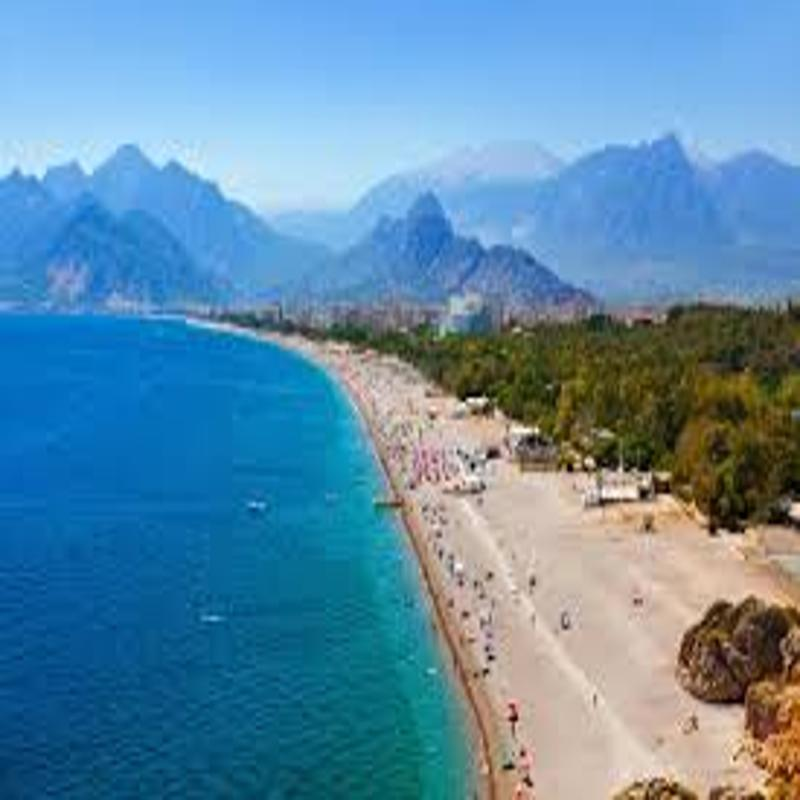

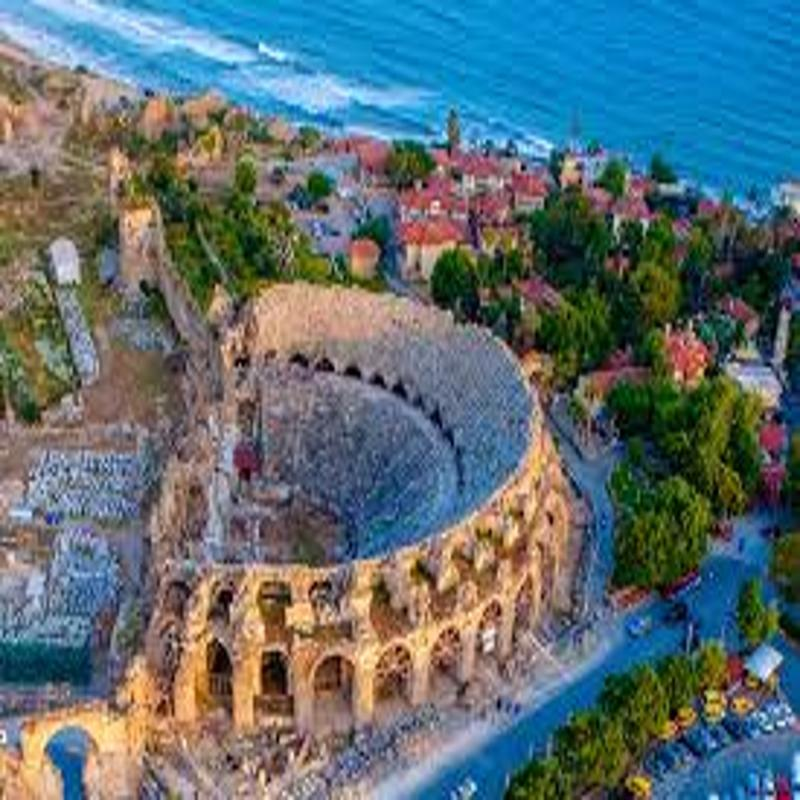

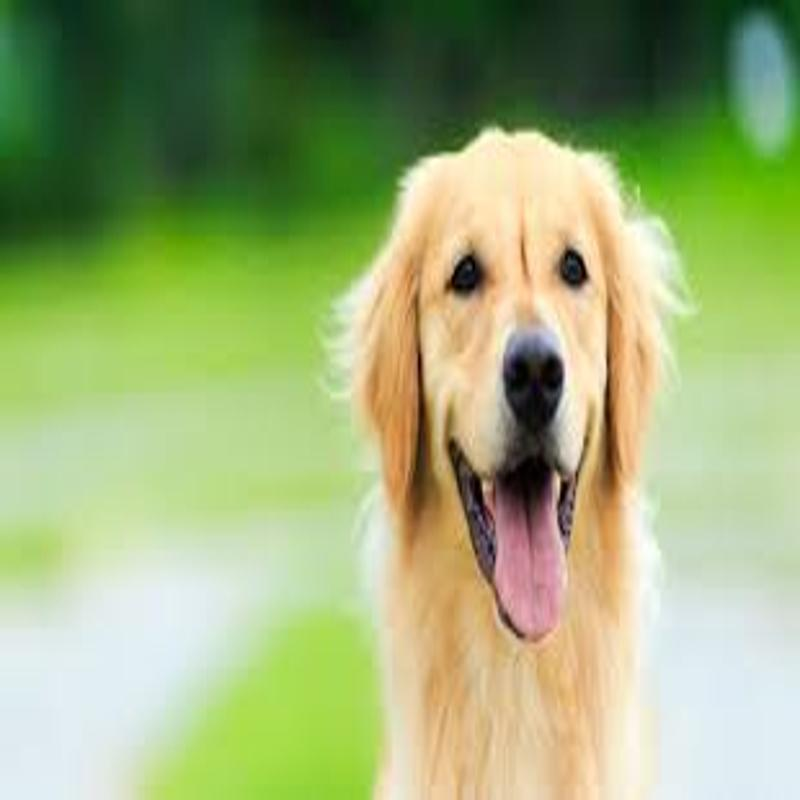

In [30]:
from IPython.display import Image,display

print("Yeniden boyutlandırışmış örnek görseller:")

for file in os.listdir(OUTPUT_FOLDER)[:3]:
  display(Image(filename=os.path.join(OUTPUT_FOLDER,file)))

# Çalışmayı Özeti

# 🎉 Sonuç

Bu notebook ile:

✔ Bir klasördeki tüm görselleri toplu olarak yeniden boyutlandırmayı öğrendik  
✔ Pillow kullanarak pratik bir yöntem  
✔ OpenCV ile hızlı bir alternatif  
✔ Drive üzerinde klasör yapısı ile çalışmayı öğrendik  
✔ Sonuçları görsel olarak önizledik  

